<a href="https://colab.research.google.com/github/ompang222/2024-1-my-BDA/blob/main/inclass/05w_0402_tue_B_ch06_dataframe_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 파이썬 설치하기

In [1]:
import sys
sys.version

'3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]'

In [2]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [3]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)

1.25.2
1.5.3


## 코랩에서 한글 설치하기

In [4]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.3 MB/s eta 0:00:00


## 그래프 해상도 설정

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '100'})

In [6]:
# 해상도 선명하게
%config lnlineBackend.figure_format = 'retina'

In [38]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

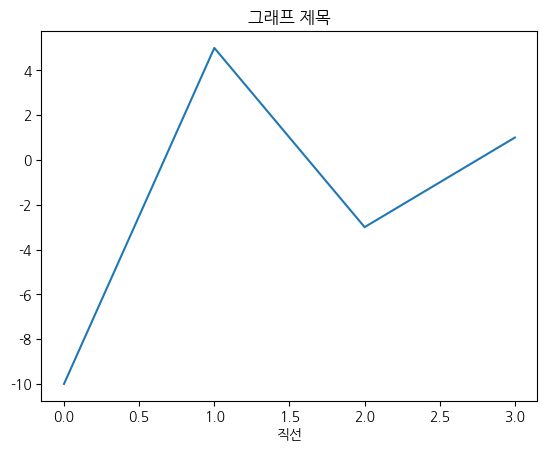

In [39]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

In [8]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.63 MiB/s, done.


In [9]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
14,15,4,75,56,78
2,3,1,45,86,78
5,6,2,50,89,98
4,5,2,25,80,65


In [10]:
exam.agg('mean')

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [12]:
exam.agg(['mean', 'median'])

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [13]:
exam.agg(mean_math = ('math', 'mean')) # 시험 예상

,math
mean_math,57.45


In [14]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [15]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'])

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [16]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=0) # 시험 예상

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [17]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count'], axis=1) # 시험 예상

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [18]:
pd.Series([np.nan, np.nan, np.nan, 5]).mean()

5.0

In [19]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [20]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']})

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [21]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [23]:
df.agg("mean")

A    4.0
B    5.0
C    7.0
dtype: float64

In [24]:
df.agg("mean", axis=0)

A    4.0
B    5.0
C    7.0
dtype: float64

In [26]:
df.agg("mean", axis='index')

A    4.0
B    5.0
C    7.0
dtype: float64

In [27]:
df.agg("mean", axis=1)

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [22]:
df.agg("mean", axis="columns")

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [28]:
df.agg(["sum", "mean"], axis="columns")

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [29]:
df.agg(["sum", "mean"], axis="index")

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


## 집단별 요약 통계량 구하기

In [31]:
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [30]:
# nclass별로 분리하기
# math 평균 구하기
exam.groupby('nclass')\
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [32]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [33]:
exam.groupby('nclass').agg(['min', 'max', 'mean'])

id           math            english            science           
       min max  mean  min max   mean     min max   mean     min max   mean
nclass                                                                    
1        1   4   2.5   30  60  46.25      86  98  94.75      50  78  61.50
2        5   8   6.5   25  90  61.25      78  90  84.25      25  98  58.25
3        9  12  10.5   20  65  45.00      65  98  86.50      15  65  39.25
4       13  16  14.5   46  75  56.75      56  98  84.75      12  78  55.00
5       17  20  18.5   65  89  78.00      68  83  74.25      58  98  83.25

In [34]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [36]:
# 인자 사용 방법: 사전 형식
# {'열명': '함수명'}
exam.groupby('nclass').agg({'math': 'mean'})

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [37]:
# dict of axis labels -> functions, function names or list of such.
# {'열명': ['함수명1', '함수명2', ...]}
exam.groupby('nclass').agg({'math': ['mean', 'min', 'max']})

math        
         mean min max
nclass               
1       46.25  30  60
2       61.25  25  90
3       45.00  20  65
4       56.75  46  75
5       78.00  65  89

## (알아 두면 좋아요) 변수들 인덱스로 바꾸지 않기

In [44]:
exam.groupby('nclass').agg(math_mean = ('math', 'mean'))

,math_mean
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [45]:
exam.groupby('nclass', as_index=False).agg(math_mean = ('math', 'mean'))

,nclass,math_mean
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


In [46]:
exam.groupby('english').agg(math_mean = ('math', 'mean'))

,math_mean
english,
56,75.00
65,65.00
68,77.00
78,85.00
80,25.00
83,78.00
85,45.00
86,45.00
87,48.00


### DataFrameGroupBy 객체

In [47]:
exam.groupby('nclass')

In [48]:
type(exam.groupby('nclass'))

pandas.core.groupby.generic.DataFrameGroupBy

In [50]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [49]:
list(exam.groupby('nclass'))

[(1,
     id  nclass  math  english  science
  0   1       1    50       98       50
  1   2       1    60       97       60
  2   3       1    45       86       78
  3   4       1    30       98       58),
 (2,
     id  nclass  math  english  science
  4   5       2    25       80       65
  5   6       2    50       89       98
  6   7       2    80       90       45
  7   8       2    90       78       25),
 (3,
      id  nclass  math  english  science
  8    9       3    20       98       15
  9   10       3    50       98       45
  10  11       3    65       65       65
  11  12       3    45       85       32),
 (4,
      id  nclass  math  english  science
  12  13       4    46       98       65
  13  14       4    48       87       12
  14  15       4    75       56       78
  15  16       4    58       98       65),
 (5,
      id  nclass  math  english  science
  16  17       5    65       68       98
  17  18       5    80       78       90
  18  19       5    89       68   

In [53]:
list(exam.groupby('nclass'))[0][1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [54]:
list(exam.groupby('nclass'))[1][1]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [56]:
for key, value in exam.groupby('nclass'):
    print(key, "\n")
    print(type(value))
    print(value, "\n", "-"*40), "\n"

1 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
0   1       1    50       98       50
1   2       1    60       97       60
2   3       1    45       86       78
3   4       1    30       98       58 
 ----------------------------------------
2 

<class 'pandas.core.frame.DataFrame'>
   id  nclass  math  english  science
4   5       2    25       80       65
5   6       2    50       89       98
6   7       2    80       90       45
7   8       2    90       78       25 
 ----------------------------------------
3 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
8    9       3    20       98       15
9   10       3    50       98       45
10  11       3    65       65       65
11  12       3    45       85       32 
 ----------------------------------------
4 

<class 'pandas.core.frame.DataFrame'>
    id  nclass  math  english  science
12  13       4    46       98       65
13  14       4    48       87       12
14  15     

### 여러 요약 통계량 한 번에 구하기

In [57]:
# nclass별로 분리
# 수학 점수 평균
# 수학 점수 합계
# 수학 점수 중앙값
# 빈도(학생 수)
exam.groupby('nclass') \
    .agg(mean_math   = ('math', 'mean'),
         sum_math    = ('math', 'sum'),
         median_math = ('math', 'median'),
         n           = ('nclass', 'count'))

,mean_math,sum_math,median_math,n
nclass,,,,
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [58]:
exam.groupby('nclass').agg('mean')

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


### (알아 두면 좋아요) 모든 변수의 요약 통계량 한 번에 구하기

In [59]:
exam.groupby('nclass').mean()

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [61]:
exam.groupby('nclass').agg(['mean', 'median'])

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [62]:
exam.groupby('nclass')[["math", "english", "science"]].agg(['mean', 'median'])

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [63]:
exam.groupby('nclass').agg(['mean', 'median'])[["math", "english", "science"]]

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [65]:
exam.groupby('nclass').count()

,id,math,english,science
nclass,,,,
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
5,4,4,4,4


In [66]:
exam.groupby('nclass')[['id']].count()

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [67]:
exam.groupby('nclass').count()[['id']]

,id
nclass,
1,4
2,4
3,4
4,4
5,4


### 집단별로 다시 집단 나누기

In [68]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [72]:
# 제조 회사 및 구동 방식별 분리
# cty 평균 구하기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [73]:
# 추가 : 고속도로 평균  연비
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'), mean_hwy = ('hwy', 'mean'))

mean_cty  mean_hwy
manufacturer drv                    
audi         4       16.82     25.27
             f       18.86     28.29
chevrolet    4       12.50     16.25
             f       18.80     27.60
             r       14.10     21.30
dodge        4       12.00     16.08
             f       15.82     22.36
ford         4       13.31     17.15
             r       14.75     21.75
honda        f       24.44     32.56
hyundai      f       18.64     26.86
jeep         4       13.50     17.62
land rover   4       11.50     16.50
lincoln      r       11.33     17.00
mercury      4       13.25     18.00
nissan       4       13.75     18.00
             f       20.00     27.56
pontiac      f       17.00     26.40
subaru       4       19.29     25.57
toyota       4       14.93     18.80
             f       21.37     29.74
volkswagen   f       20.93     29.22

In [76]:
## audi의 drv별 빈도

# audi 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"').groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-80-198813a69808>, line 1)

In [81]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "chevrolet"') \
   .groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,4
f,5
r,10


###
(알아 두면 좋아요) value_counts()로 집단별 빈도 간단하게 구하기

In [82]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [83]:
mpg[['drv']].value_counts()

drv
f      106
4      103
r       25
dtype: int64

In [84]:
mpg[['drv']].value_counts().to_frame()

,0
drv,
f,106
4,103
r,25


In [85]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [86]:
mpg[['drv', 'cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [89]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


### pandas 함수 조합하기

In [93]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56


In [94]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


### 혼자서 해보기

### 데이터 합치기

In [95]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id'      : [1, 2, 3, 4, 5],
                      'midterm' : [60, 80, 70, 90, 85]})

# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [96]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [97]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [98]:
pd.merge(test1,test2)

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [99]:
pd.merge(test1,test2, how ='inner', on='id')

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


## 다른 데이터를 활용해 변수 추가하기

In [100]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [101]:
pd.merge(exam, name)

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기: concat()

In [105]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [106]:
group_a

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [107]:
group_b

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [108]:
# 데이터 합쳐서 group_all에 할당
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [109]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [110]:
group_all.reset_index()

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [111]:
group_all.reset_index(drop=True)

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### 심화 학습 : 공식 매뉴얼 문서

In [112]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [113]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [116]:
# key 및 rkey 열에 df1 및 df2를 병합, 공통 키가 다른 경우
# 값 열에는 기본 접미사인 _x 및 _y가 추가
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [117]:
df1.merge(df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [118]:
# 겹치는 열에 지정된 왼쪽 및 오른쪽 접미사를 추가하여 DataFrames df1 및 df2를 병합 .
df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left', '_right'))

,lkey,value_left,rkey,value_right
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


### 정리하기

In [119]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')

## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거

## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()

## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])

## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total').head()

## 6. 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math', 'mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean'))

## 7. 데이터 합치기
pd.merge(test1, test2, how = 'left', on = 'id')  # 가로로 합치기
pd.concat([group_a, group_b])                    # 세로로 합치기

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80
